# Letter Recognition

### Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Data Preparation

### Data Loading

In [3]:
data = pd.read_csv("../data/letter-recognition.csv",header= None)

In [4]:
data[0].unique()

array(['letter', 'T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X',
       'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U',
       'K', 'Z'], dtype=object)

In [5]:
data = data[data[0].str.len() == 1]
data[0] = data[0].apply(lambda x: ord(x)- ord('A'))

In [6]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [7]:
y = to_categorical(y,num_classes=26)

### Data Splitting

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Data Preprocessing

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Creation

### Loading the Model

In [10]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(26,activation='softmax')
])

### Model Compilation

In [11]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics= ['accuracy']
)

### Traing the model

In [12]:
history = model.fit(X_train,y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_split = 0.2,
                    verbose = 1
                   )

Epoch 1/30


400/400 [==============================] - 2s 3ms/step - loss: 2.0724 - accuracy: 0.3948 - val_loss: 1.1447 - val_accuracy: 0.6903
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 1.2314 - accuracy: 0.6154 - val_loss: 0.8860 - val_accuracy: 0.7422
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 1.0431 - accuracy: 0.6745 - val_loss: 0.7554 - val_accuracy: 0.7784
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.9272 - accuracy: 0.7055 - val_loss: 0.6760 - val_accuracy: 0.7972
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.8595 - accuracy: 0.7259 - val_loss: 0.6183 - val_accuracy: 0.8178
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 0.8009 - accuracy: 0.7472 - val_loss: 0.5754 - val_accuracy: 0.8350
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 0.7587 - accuracy: 0.7584 - val_loss: 0.5334 - val_accuracy: 0.8456
Epoc

### Model Evaluation and validation

In [13]:
test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(f"Test Accuracy : {test_accuracy*100:.2f}%")

Test Accuracy : 92.12%


In [14]:
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)
print("Classification Report:\n")
print(classification_report(y_true,predictions,target_names=[chr(i) for i in range(ord('A'),ord('Z')+1)]))

125/125 [==============================] - 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           A       0.93      0.96      0.94       149
           B       0.80      0.97      0.87       153
           C       0.98      0.93      0.95       137
           D       0.90      0.94      0.92       156
           E       0.92      0.89      0.91       141
           F       0.88      0.89      0.88       140
           G       0.87      0.91      0.89       160
           H       0.92      0.76      0.83       144
           I       0.97      0.92      0.94       146
           J       0.96      0.95      0.95       149
           K       0.85      0.85      0.85       130
           L       0.97      0.92      0.94       155
           M       0.96      0.98      0.97       168
           N       0.97      0.91      0.94       151
           O       0.92      0.92      0.92       145
           P       0.98      0.86      0.92       173
  

## Visualization

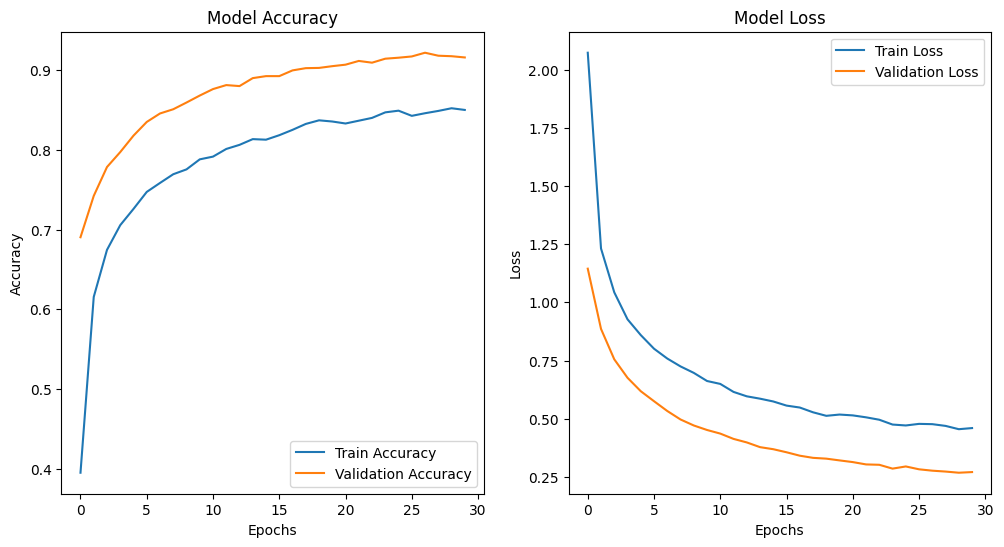

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()
